AIE425 Intelligent Recommender Systems, Fall Semester 24/25


Assignment #**1: Neighborhood CF models (user, item-based CF)



221100674, Nabila Ahmed Ali Mohamed Hafez


In [157]:
import requests
import pandas as pd
import numpy as np
import random

# TMDb API Key
API_KEY = 'f65e3ca49280e60653302fad64b84d8c'
BASE_URL = 'https://api.themoviedb.org/3'


# ===================== Step 1: Fetch Top-Rated Movies =====================

def fetch_top_rated_movies(min_vote_count=500, max_movies=100, pages=5):
    """
    Fetch top-rated movies with a minimum number of votes.
    """
    movies = []
    for page in range(1, pages + 1):
        page_movies = retrieve_movies_from_page(page, min_vote_count)
        movies.extend(page_movies)
        if len(movies) >= max_movies:
            break
    print(f"[INFO] Collected {len(movies)} movies with at least {min_vote_count} votes.")
    return pd.DataFrame(movies[:max_movies])

def retrieve_movies_from_page(page, min_vote_count):
    """
    Retrieve movies from a specific page and filter by vote count.
    """
    url = f"{BASE_URL}/movie/top_rated?api_key={API_KEY}&language=en-US&page={page}"
    response = requests.get(url)
    if response.status_code == 200:
        data = response.json().get('results', [])
        return [movie for movie in data if movie['vote_count'] >= min_vote_count]
    else:
        print(f"[ERROR] Failed to retrieve data from page {page}: Status code {response.status_code}")
        return []


# ===================== Step 2: Display Top Movies =====================

def display_top_movies(movies_df, top_n=10):
    """
    Sort movies by vote count, display the top N most-reviewed movies.
    """
    top_movies = movies_df.sort_values(by='vote_count', ascending=False).head(top_n)
    print("\n================== Top 10 Most-Reviewed Movies ==================")
    for i, row in top_movies.iterrows():
        print(f"{i+1}. {row['title']} (ID: {row['id']}) - Rating: {row['vote_average']} | Votes: {row['vote_count']}")
    print("=================================================================\n")
    return top_movies


# ===================== Step 3: Generate User Ratings =====================

def create_user_ratings(movies_df, num_users=100):
    """
    Generate synthetic ratings for users based on the collected movies.
    """
    ratings = []
    for user_id in range(1, num_users + 1):
        user_ratings = assign_ratings_to_user(user_id, movies_df)
        ratings.extend(user_ratings)
    print(f"[INFO] Generated ratings for {num_users} users.")
    return pd.DataFrame(ratings)

def assign_ratings_to_user(user_id, movies_df):
    """
    Assign ratings to movies for a specific user, with top 10 users rating top movies.
    """
    media_ids = movies_df['id'].values
    if user_id <= 10:
        rated_movies = top_10_movies['id'].values
    else:
        rated_movies = np.random.choice(media_ids, size=random.randint(10, 20), replace=False)

    return [generate_single_rating(user_id, movie_id, movies_df) for movie_id in rated_movies]

def generate_single_rating(user_id, movie_id, movies_df):
    """
    Generate a single rating entry with some noise.
    """
    base_rating = movies_df.loc[movies_df['id'] == movie_id, 'vote_average'].values[0]
    noisy_rating = round(base_rating + random.uniform(-1, 1), 1)
    return {'user_id': user_id, 'media_id': movie_id, 'rating': noisy_rating}


# ===================== Step 4: Save Ratings and Display Data =====================

def save_ratings_to_csv(ratings_df, movies_df, filename='user_movie_ratings.csv'):
    """
    Merge ratings with movie titles and save to CSV.
    """
    merged_df = merge_ratings_with_titles(ratings_df, movies_df)
    merged_df.to_csv(filename, index=False)
    print(f"[INFO] Ratings data saved to '{filename}'.")
    return merged_df

def merge_ratings_with_titles(ratings_df, movies_df):
    """
    Merge user ratings with movie titles for easy reference.
    """
    return ratings_df.merge(movies_df[['id', 'title']], left_on='media_id', right_on='id').drop('id', axis=1)

def display_sample_ratings(ratings_df):
    """
    Display a sample of user ratings.
    """
    print("\n================== Sample of User Ratings ==================")
    print(ratings_df.head(10).to_string(index=False))
    print("============================================================\n")

def display_top_user_ratings(ratings_df, top_movies):
    """
    Display ratings for the top 10 movies as rated by the top 10 users.
    """
    top_user_ratings = ratings_df[(ratings_df['user_id'] <= 10) & (ratings_df['media_id'].isin(top_movies['id']))]
    print("\n=========== Ratings for Top 10 Movies by Top 10 Users ===========")
    print(top_user_ratings[['user_id', 'media_id', 'rating', 'title']].to_string(index=False))
    print("=================================================================\n")


# ===================== Main Execution Flow =====================

def main():
    print("\n================== Step 1: Fetching Top-Rated Movies ==================")
    movies_df = fetch_top_rated_movies()

    print("\n================== Step 2: Displaying Top 10 Movies ==================")
    global top_10_movies
    top_10_movies = display_top_movies(movies_df)

    print("\n================== Step 3: Generating User Ratings ==================")
    user_ratings_df = create_user_ratings(movies_df)

    print("\n================== Step 4: Saving Ratings and Displaying Data ==================")
    detailed_ratings_df = save_ratings_to_csv(user_ratings_df, movies_df)

    print("\n================== Step 5: Displaying Sample Ratings ==================")
    display_sample_ratings(detailed_ratings_df)

    print("\n================== Step 6: Displaying Top User Ratings ==================")
    display_top_user_ratings(detailed_ratings_df, top_10_movies)

# Run the main function if this script is executed
if __name__ == "__main__":
    main()



================== Step 1: Fetching Top-Rated Movies ==================
[INFO] Collected 86 movies with at least 500 votes.

================== Step 2: Displaying Top 10 Movies ==================

================== Top 10 Most-Reviewed Movies ==================
43. Inception (ID: 27205) - Rating: 8.4 | Votes: 36476
22. Interstellar (ID: 157336) - Rating: 8.442 | Votes: 35484
9. The Dark Knight (ID: 155) - Rating: 8.516 | Votes: 32798
80. Avengers: Infinity War (ID: 299536) - Rating: 8.243 | Votes: 29640
23. Fight Club (ID: 550) - Rating: 8.439 | Votes: 29298
12. Pulp Fiction (ID: 680) - Rating: 8.5 | Votes: 27827
15. Forrest Gump (ID: 13) - Rating: 8.472 | Votes: 27360
1. The Shawshank Redemption (ID: 278) - Rating: 8.7 | Votes: 27050
79. Avengers: Endgame (ID: 299534) - Rating: 8.249 | Votes: 25530
28. The Lord of the Rings: The Fellowship of the Ring (ID: 120) - Rating: 8.4 | Votes: 25070


================== Step 3: Generating User Ratings ==================
[INFO] Generated ratin

In [158]:
import pandas as pd

# ===================== Step 1: Load Data =====================

def load_data(filename):
    """
    Load the data from a CSV file.
    """
    print(f"\n--- Loading Data from '{filename}' ---")
    return pd.read_csv(filename)

# ===================== Step 2: Clean Data =====================

def remove_duplicates(df):
    """
    Remove duplicate entries based on 'user_id' and 'media_id'.
    """
    initial_count = len(df)
    df = df.drop_duplicates(subset=['user_id', 'media_id'], keep='first')
    removed_count = initial_count - len(df)
    print(f"\n--- Removing Duplicates ---")
    print(f"Total duplicates removed: {removed_count}")
    return df

def format_ratings(df):
    """
    Round and convert ratings to integer format.
    """
    df['rating'] = df['rating'].round(0).astype(int)
    print("\n--- Formatting Ratings ---")
    print("Ratings have been rounded and converted to integer format.")
    return df

def ensure_column_order(df):
    """
    Reorder columns to ensure consistent formatting.
    """
    expected_columns = ['user_id', 'media_id', 'rating', 'title']
    df = df[expected_columns]
    print("\n--- Ensuring Column Order ---")
    print("Columns reordered to: 'user_id', 'media_id', 'rating', 'title'")
    return df

# ===================== Step 3: Save Cleaned Data =====================

def save_data(df, filename):
    """
    Save the cleaned DataFrame to a CSV file.
    """
    df.to_csv(filename, index=False)
    print(f"\n--- Saving Cleaned Data ---")
    print(f"Cleaned data has been saved to '{filename}'.")

# ===================== Step 4: Display Sample Data =====================

def display_sample(df, num_rows=10):
    """
    Display a sample of the cleaned data.
    """
    print("\n================== Sample of Cleaned Data ==================")
    print(df.head(num_rows).to_string(index=False))
    print("============================================================\n")

# ===================== Main Execution Flow =====================

def main():
    # Define filenames
    initial_csv = 'user_movie_ratings.csv'
    cleaned_csv = 'cleaned_user_movie_ratings.csv'

    print("\n================== Data Cleaning Process ==================")

    # Step-by-step process
    df = load_data(initial_csv)
    df = remove_duplicates(df)
    df = format_ratings(df)
    df = ensure_column_order(df)

    save_data(df, cleaned_csv)
    display_sample(df)

    print("============================================================")
    print("                     Cleaning Process Complete               ")
    print("============================================================\n")

# Run the main function if this script is executed
if __name__ == "__main__":
    main()


================== Data Cleaning Process ==================

--- Loading Data from 'user_movie_ratings.csv' ---

--- Removing Duplicates ---
Total duplicates removed: 0

--- Formatting Ratings ---
Ratings have been rounded and converted to integer format.

--- Ensuring Column Order ---
Columns reordered to: 'user_id', 'media_id', 'rating', 'title'

--- Saving Cleaned Data ---
Cleaned data has been saved to 'cleaned_user_movie_ratings.csv'.

================== Sample of Cleaned Data ==================
 user_id  media_id  rating                                             title
       1     27205       8                                         Inception
       1    157336       8                                      Interstellar
       1       155       8                                   The Dark Knight
       1    299536       9                            Avengers: Infinity War
       1       550       9                                        Fight Club
       1       680       9     

In [159]:
import pandas as pd

# ===================== Step 1: Load Data =====================

def load_cleaned_data(filename):
    """
    Load the cleaned user-movie ratings data from a CSV file.
    """
    print(f"\n--- Loading Cleaned Data from '{filename}' ---")
    return pd.read_csv(filename)

# ===================== Step 2: Identify Top Users and Movies =====================

def get_top_10_users(df):
    """
    Identify the top 10 users by total ratings count.
    """
    top_users = df['user_id'].value_counts().nlargest(10).index.tolist()
    print("\n--- Top 10 Users Identified ---")
    print(f"Top 10 Users by Ratings Count: {top_users}")
    return top_users

def get_top_10_movies(df):
    """
    Identify the top 10 movies by total ratings count.
    """
    top_movies = df['media_id'].value_counts().nlargest(10).index.tolist()
    print("\n--- Top 10 Movies Identified ---")
    print(f"Top 10 Movies by Ratings Count: {top_movies}")
    return top_movies

# ===================== Step 3: Filter Data =====================

def filter_top_users_and_movies(df, top_users, top_movies):
    """
    Filter the DataFrame to include only the top 10 users and top 10 movies.
    """
    filtered_df = df[df['user_id'].isin(top_users) & df['media_id'].isin(top_movies)]
    print(f"\n--- Data Filtered ---")
    print(f"Filtered Data Includes Only Top 10 Users and Top 10 Movies")
    return filtered_df

# ===================== Step 4: Create User-Item Matrix =====================

def create_user_item_matrix(filtered_df, top_users, top_movies):
    """
    Create a 10x10 user-item matrix from the filtered data.
    """
    # Create a pivot table
    user_item_matrix = filtered_df.pivot(index='user_id', columns='media_id', values='rating')

    # Reindex to ensure 10x10 structure and fill missing values with zeroes
    user_item_matrix = user_item_matrix.reindex(index=top_users, columns=top_movies, fill_value=0)
    user_item_matrix.fillna(0, inplace=True)  # Replace any remaining NaNs with 0
    print("\n--- User-Item Matrix Created ---")
    print("Matrix dimensions: 10x10 (Top 10 Users by Top 10 Movies)")
    return user_item_matrix

# ===================== Step 5: Save and Display User-Item Matrix =====================

def save_user_item_matrix(matrix, filename):
    """
    Save the user-item matrix to a CSV file.
    """
    matrix.to_csv(filename)
    print(f"\n--- User-Item Matrix Saved ---")
    print(f"Matrix saved to '{filename}'")

def display_matrix(matrix):
    """
    Display the user-item matrix in a formatted manner.
    """
    print("\n================== 10x10 User-Item Matrix ==================")
    print(matrix.to_string())
    print("============================================================\n")

# ===================== Main Execution Flow =====================

def main():
    # Define the filename for the cleaned data and the user-item matrix
    cleaned_data_file = 'cleaned_user_movie_ratings.csv'
    matrix_csv_filename = 'user_item_matrix_10x10.csv'

    print("\n================== User-Item Matrix Generation ==================")

    # Step-by-step process
    df = load_cleaned_data(cleaned_data_file)
    top_10_users = get_top_10_users(df)
    top_10_movies = get_top_10_movies(df)
    filtered_df = filter_top_users_and_movies(df, top_10_users, top_10_movies)
    user_item_matrix_10x10 = create_user_item_matrix(filtered_df, top_10_users, top_10_movies)

    # Save and display the user-item matrix
    save_user_item_matrix(user_item_matrix_10x10, matrix_csv_filename)
    display_matrix(user_item_matrix_10x10)

    print("============================================================")
    print("                  User-Item Matrix Process Complete          ")
    print("============================================================\n")

# Run the main function if this script is executed
if __name__ == "__main__":
    main()




================== User-Item Matrix Generation ==================

--- Loading Cleaned Data from 'cleaned_user_movie_ratings.csv' ---

--- Top 10 Users Identified ---
Top 10 Users by Ratings Count: [16, 59, 58, 76, 26, 77, 90, 68, 72, 24]

--- Top 10 Movies Identified ---
Top 10 Movies by Ratings Count: [13, 27205, 278, 157336, 299534, 508965, 807, 155, 441130, 299536]

--- Data Filtered ---
Filtered Data Includes Only Top 10 Users and Top 10 Movies

--- User-Item Matrix Created ---
Matrix dimensions: 10x10 (Top 10 Users by Top 10 Movies)

--- User-Item Matrix Saved ---
Matrix saved to 'user_item_matrix_10x10.csv'

================== 10x10 User-Item Matrix ==================
media_id  13      27205   278     157336  299534  508965  807     155     441130  299536
user_id                                                                                 
16           0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0
59           0.0     8.0     9.0     9.0     0.0

In [160]:
import pandas as pd

# ===================== Step 1: Load User-Item Matrix =====================

def load_user_item_matrix(filename):
    """
    Load the 10x10 user-item matrix from a CSV file.
    """
    print(f"\n--- Loading User-Item Matrix from '{filename}' ---")
    return pd.read_csv(filename, index_col='user_id')

# ===================== Step 2: Calculate Average Ratings =====================

def calculate_average_ratings(matrix):
    """
    Calculate the average rating per item, ignoring 0 values.
    """
    print("\n--- Calculating Average Ratings for Each Item ---")
    # Replace 0 with NaN to ignore in mean calculation, then calculate mean
    avg_ratings = matrix.replace(0, pd.NA).mean(skipna=True)
    avg_ratings_df = pd.DataFrame(avg_ratings, columns=['average_rating'])
    print("[INFO] Average ratings calculated (0 values ignored).")
    return avg_ratings_df

# ===================== Step 3: Save Average Ratings =====================

def save_average_ratings(avg_ratings_df, filename):
    """
    Save the average ratings DataFrame to a CSV file.
    """
    avg_ratings_df.to_csv(filename)
    print(f"\n--- Average Ratings Saved ---")
    print(f"Average ratings data saved to '{filename}'.")

# ===================== Step 4: Display Average Ratings =====================

def display_average_ratings(avg_ratings_df):
    """
    Display the average rating per item in a formatted way.
    """
    print("\n================== Average Rating per Item ==================")
    print(avg_ratings_df.to_string())
    print("============================================================\n")

# ===================== Main Execution Flow =====================

def main():
    # Define filenames
    user_item_matrix_file = 'user_item_matrix_10x10.csv'
    average_ratings_csv_filename = 'average_item_ratings.csv'

    print("\n================== Average Ratings Calculation Process ==================")

    # Step-by-step process
    user_item_matrix = load_user_item_matrix(user_item_matrix_file)
    average_ratings_df = calculate_average_ratings(user_item_matrix)

    save_average_ratings(average_ratings_df, average_ratings_csv_filename)
    display_average_ratings(average_ratings_df)

    print("============================================================")
    print("               Average Ratings Calculation Complete          ")
    print("============================================================\n")

# Run the main function if this script is executed
if __name__ == "__main__":
    main()



================== Average Ratings Calculation Process ==================

--- Loading User-Item Matrix from 'user_item_matrix_10x10.csv' ---

--- Calculating Average Ratings for Each Item ---
[INFO] Average ratings calculated (0 values ignored).

--- Average Ratings Saved ---
Average ratings data saved to 'average_item_ratings.csv'.

================== Average Rating per Item ==================
       average_rating
13                9.0
27205        8.333333
278               9.5
157336       8.666667
299534            8.0
508965            7.5
807               8.5
155               9.0
441130       7.666667
299536            8.0

               Average Ratings Calculation Complete          




================== Similarity Matrix Calculation Process ==================

--- Loading User-Item Matrix from 'user_item_matrix_10x10.csv' ---

--- Computing User-Based Cosine Similarity ---
[INFO] User-based cosine similarity computed.

--- Computing User-Based Pearson Correlation ---
[INFO] User-based Pearson correlation computed.

--- Computing Item-Based Cosine Similarity ---
[INFO] Item-based cosine similarity computed.

--- Computing Item-Based Pearson Correlation ---


<ipython-input-161-07749d6dfffc>:38: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  corr, _ = pearsonr(matrix.loc[user1], matrix.loc[user2])


[INFO] Item-based Pearson correlation computed.

================== User-Based Cosine Similarity Matrix ==================
user_id   16        59        58        76        26   77        90        68  \
user_id                                                                         
16       0.0  0.000000  0.000000  0.000000  0.000000  0.0  0.000000  0.000000   
59       0.0  1.000000  0.624208  0.452537  0.000000  0.0  0.425195  0.286371   
58       0.0  0.624208  1.000000  0.218743  0.395004  0.0  0.528498  0.316397   
76       0.0  0.452537  0.218743  1.000000  0.309350  0.0  0.000000  0.318584   
26       0.0  0.000000  0.395004  0.309350  1.000000  0.0  0.000000  0.447452   
77       0.0  0.000000  0.000000  0.000000  0.000000  0.0  0.000000  0.000000   
90       0.0  0.425195  0.528498  0.000000  0.000000  0.0  1.000000  0.000000   
68       0.0  0.286371  0.316397  0.318584  0.447452  0.0  0.000000  1.000000   
72       0.0  0.478345  0.000000  0.000000  0.000000  0.0  0.000000

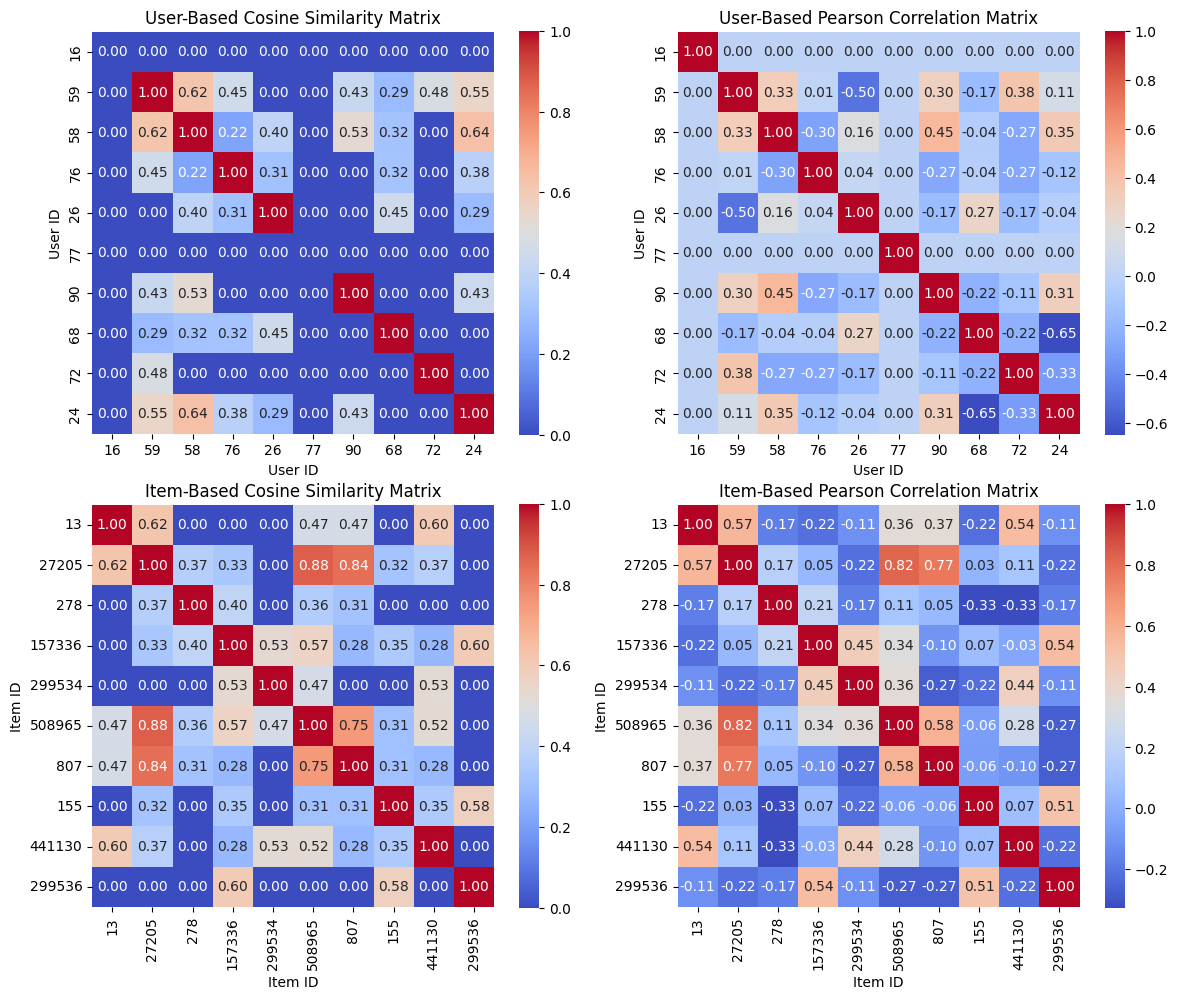


--- User-Based Cosine Similarity Matrix Saved ---
User-Based Cosine Similarity Matrix saved to 'user_cosine_similarity_matrix.csv'.

--- User-Based Pearson Correlation Matrix Saved ---
User-Based Pearson Correlation Matrix saved to 'user_pearson_correlation_matrix.csv'.

--- Item-Based Cosine Similarity Matrix Saved ---
Item-Based Cosine Similarity Matrix saved to 'item_cosine_similarity_matrix.csv'.

--- Item-Based Pearson Correlation Matrix Saved ---
Item-Based Pearson Correlation Matrix saved to 'item_pearson_correlation_matrix.csv'.
               Similarity Matrix Calculation Complete        



In [161]:
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
from scipy.stats import pearsonr
import seaborn as sns
import matplotlib.pyplot as plt

# ===================== Step 1: Load User-Item Matrix =====================

def load_user_item_matrix(filename):
    """
    Load the user-item matrix from a CSV file.
    """
    print(f"\n--- Loading User-Item Matrix from '{filename}' ---")
    return pd.read_csv(filename, index_col=0)

# ===================== Step 2: Compute User-Based Similarities =====================

def compute_user_cosine_similarity(matrix):
    """
    Compute cosine similarity for user-based collaborative filtering.
    """
    print("\n--- Computing User-Based Cosine Similarity ---")
    cosine_matrix = pd.DataFrame(cosine_similarity(matrix), index=matrix.index, columns=matrix.index)
    print("[INFO] User-based cosine similarity computed.")
    return cosine_matrix

def compute_user_pearson_correlation(matrix):
    """
    Compute Pearson correlation for user-based collaborative filtering.
    """
    print("\n--- Computing User-Based Pearson Correlation ---")
    user_ids = matrix.index
    correlation_matrix = pd.DataFrame(index=user_ids, columns=user_ids)

    for user1 in user_ids:
        for user2 in user_ids:
            if user1 != user2:
                corr, _ = pearsonr(matrix.loc[user1], matrix.loc[user2])
                correlation_matrix.loc[user1, user2] = corr
            else:
                correlation_matrix.loc[user1, user2] = 1.0  # Self-similarity

    correlation_matrix = correlation_matrix.apply(pd.to_numeric, errors='coerce').fillna(0)
    print("[INFO] User-based Pearson correlation computed.")
    return correlation_matrix

# ===================== Step 3: Compute Item-Based Similarities =====================

def compute_item_cosine_similarity(matrix):
    """
    Compute cosine similarity for item-based collaborative filtering.
    """
    print("\n--- Computing Item-Based Cosine Similarity ---")
    cosine_matrix = pd.DataFrame(cosine_similarity(matrix.T), index=matrix.columns, columns=matrix.columns)
    print("[INFO] Item-based cosine similarity computed.")
    return cosine_matrix

def compute_item_pearson_correlation(matrix):
    """
    Compute Pearson correlation for item-based collaborative filtering.
    """
    print("\n--- Computing Item-Based Pearson Correlation ---")
    item_ids = matrix.columns
    correlation_matrix = pd.DataFrame(index=item_ids, columns=item_ids)

    for item1 in item_ids:
        for item2 in item_ids:
            if item1 != item2:
                corr, _ = pearsonr(matrix[item1], matrix[item2])
                correlation_matrix.loc[item1, item2] = corr
            else:
                correlation_matrix.loc[item1, item2] = 1.0  # Self-similarity

    correlation_matrix = correlation_matrix.apply(pd.to_numeric, errors='coerce').fillna(0)
    print("[INFO] Item-based Pearson correlation computed.")
    return correlation_matrix

# ===================== Step 4: Display Similarity Matrices =====================

def display_similarity_matrix(matrix, title):
    """
    Display a similarity matrix with a title.
    """
    print(f"\n================== {title} ==================")
    print(matrix)
    print("============================================================\n")

# ===================== Step 5: Plot Similarity Matrices =====================

def plot_similarity_matrices(user_cosine, user_pearson, item_cosine, item_pearson):
    """
    Plot the user and item similarity matrices.
    """
    plt.figure(figsize=(12, 10))

    # Plot User-Based Cosine Similarity
    plt.subplot(2, 2, 1)
    sns.heatmap(user_cosine, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, square=True)
    plt.title('User-Based Cosine Similarity Matrix')
    plt.xlabel('User ID')
    plt.ylabel('User ID')

    # Plot User-Based Pearson Correlation
    plt.subplot(2, 2, 2)
    sns.heatmap(user_pearson, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, square=True)
    plt.title('User-Based Pearson Correlation Matrix')
    plt.xlabel('User ID')
    plt.ylabel('User ID')

    # Plot Item-Based Cosine Similarity
    plt.subplot(2, 2, 3)
    sns.heatmap(item_cosine, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, square=True)
    plt.title('Item-Based Cosine Similarity Matrix')
    plt.xlabel('Item ID')
    plt.ylabel('Item ID')

    # Plot Item-Based Pearson Correlation
    plt.subplot(2, 2, 4)
    sns.heatmap(item_pearson, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, square=True)
    plt.title('Item-Based Pearson Correlation Matrix')
    plt.xlabel('Item ID')
    plt.ylabel('Item ID')

    plt.tight_layout()
    plt.show()

# ===================== Step 6: Save Similarity Matrices =====================

def save_similarity_matrix(matrix, filename, description):
    """
    Save a similarity matrix to a CSV file with a description.
    """
    matrix.to_csv(filename)
    print(f"\n--- {description} Saved ---")
    print(f"{description} saved to '{filename}'.")

# ===================== Main Execution Flow =====================

def main():
    # Define file paths
    user_item_matrix_file = 'user_item_matrix_10x10.csv'
    cosine_user_csv_filename = 'user_cosine_similarity_matrix.csv'
    pearson_user_csv_filename = 'user_pearson_correlation_matrix.csv'
    cosine_item_csv_filename = 'item_cosine_similarity_matrix.csv'
    pearson_item_csv_filename = 'item_pearson_correlation_matrix.csv'

    print("\n================== Similarity Matrix Calculation Process ==================")

    # Step-by-step process
    user_item_matrix = load_user_item_matrix(user_item_matrix_file)

    # User-based similarities
    cosine_similarity_matrix_user = compute_user_cosine_similarity(user_item_matrix)
    pearson_correlation_matrix_user = compute_user_pearson_correlation(user_item_matrix)

    # Item-based similarities
    cosine_similarity_matrix_item = compute_item_cosine_similarity(user_item_matrix)
    pearson_correlation_matrix_item = compute_item_pearson_correlation(user_item_matrix)

    # Display matrices
    display_similarity_matrix(cosine_similarity_matrix_user, "User-Based Cosine Similarity Matrix")
    display_similarity_matrix(pearson_correlation_matrix_user, "User-Based Pearson Correlation Matrix")
    display_similarity_matrix(cosine_similarity_matrix_item, "Item-Based Cosine Similarity Matrix")
    display_similarity_matrix(pearson_correlation_matrix_item, "Item-Based Pearson Correlation Matrix")

    # Plot matrices
    plot_similarity_matrices(cosine_similarity_matrix_user, pearson_correlation_matrix_user, cosine_similarity_matrix_item, pearson_correlation_matrix_item)

    # Save matrices
    save_similarity_matrix(cosine_similarity_matrix_user, cosine_user_csv_filename, "User-Based Cosine Similarity Matrix")
    save_similarity_matrix(pearson_correlation_matrix_user, pearson_user_csv_filename, "User-Based Pearson Correlation Matrix")
    save_similarity_matrix(cosine_similarity_matrix_item, cosine_item_csv_filename, "Item-Based Cosine Similarity Matrix")
    save_similarity_matrix(pearson_correlation_matrix_item, pearson_item_csv_filename, "Item-Based Pearson Correlation Matrix")

    print("============================================================")
    print("               Similarity Matrix Calculation Complete        ")
    print("============================================================\n")

# Run the main function if this script is executed
if __name__ == "__main__":
    main()



================== Prediction and Evaluation Process ==================

--- Loading User-Item Matrix from 'user_item_matrix_10x10.csv' ---

--- Computing Cosine Similarity Matrix ---
[INFO] Cosine similarity matrix computed.

--- Computing Pearson Correlation Matrix ---
[INFO] Pearson correlation matrix computed.

--- Calculating User-Based Predictions ---
[INFO] User-based predictions completed.

--- Cosine Similarity Error Metrics ---
Cosine Similarity - MAE: 5.87, RMSE: 7.04

--- Calculating User-Based Predictions ---
[INFO] User-based predictions completed.

--- Pearson Correlation Error Metrics ---
Pearson Correlation - MAE: 5.49, RMSE: 6.58

================== Comparison of Results ==================
Cosine Similarity - MAE: 5.87, RMSE: 7.04
Pearson Correlation - MAE: 5.49, RMSE: 6.58


<ipython-input-162-3fcd2c9a6756>:39: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  corr, _ = pearsonr(matrix.loc[user1], matrix.loc[user2])
<ipython-input-162-3fcd2c9a6756>:77: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  predictions.fillna(0, inplace=True)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
<ipython-input-162-3fcd2c9a6756>:77: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To

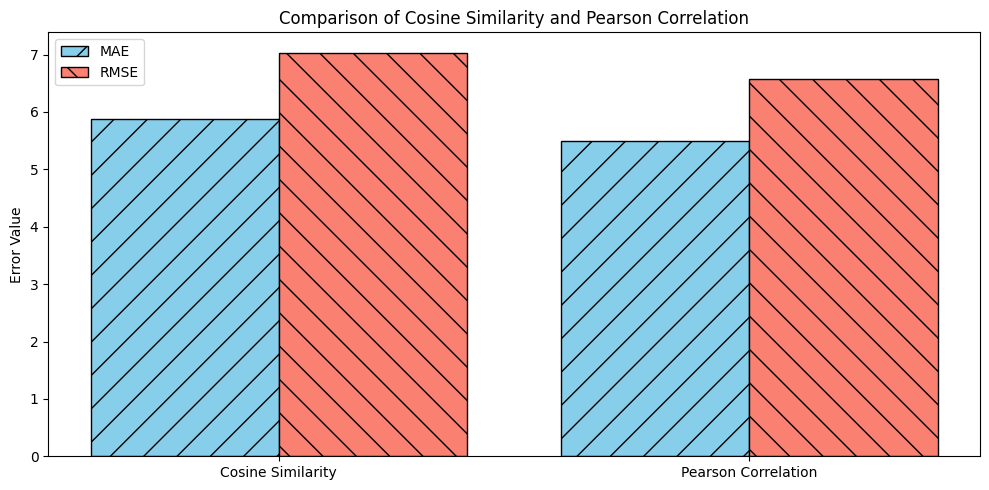

               Prediction and Evaluation Complete          



In [162]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics.pairwise import cosine_similarity
from scipy.stats import pearsonr
import matplotlib.pyplot as plt

# ===================== Step 1: Load Data =====================

def load_user_item_matrix(filename):
    """
    Load the user-item matrix from a CSV file.
    """
    print(f"\n--- Loading User-Item Matrix from '{filename}' ---")
    return pd.read_csv(filename, index_col=0)

# ===================== Step 2: Compute Similarity Matrices =====================

def compute_cosine_similarity_matrix(matrix):
    """
    Compute cosine similarity for user-based collaborative filtering.
    """
    print("\n--- Computing Cosine Similarity Matrix ---")
    cosine_matrix = pd.DataFrame(cosine_similarity(matrix), index=matrix.index, columns=matrix.index)
    print("[INFO] Cosine similarity matrix computed.")
    return cosine_matrix

def compute_pearson_correlation_matrix(matrix):
    """
    Compute Pearson correlation matrix for user-based collaborative filtering.
    """
    print("\n--- Computing Pearson Correlation Matrix ---")
    user_ids = matrix.index
    correlation_matrix = pd.DataFrame(index=user_ids, columns=user_ids)

    for user1 in user_ids:
        for user2 in user_ids:
            if user1 != user2:
                corr, _ = pearsonr(matrix.loc[user1], matrix.loc[user2])
                correlation_matrix.loc[user1, user2] = corr
            else:
                correlation_matrix.loc[user1, user2] = 1.0  # Self-similarity

    correlation_matrix = correlation_matrix.apply(pd.to_numeric, errors='coerce').fillna(0)
    print("[INFO] Pearson correlation matrix computed.")
    return correlation_matrix

# ===================== Step 3: User-Based Prediction Calculation =====================

def predict_ratings_user_based(user_id, item_id, user_item_matrix, similarity_matrix):
    """
    Predict ratings for a given user and item based on user-based collaborative filtering.
    """
    sim_scores = similarity_matrix[user_id]
    item_ratings = user_item_matrix[item_id]

    weighted_sum = np.dot(sim_scores, item_ratings)
    sim_sum = np.sum(np.abs(sim_scores[item_ratings > 0]))

    if sim_sum == 0:
        return 0  # No prediction can be made
    else:
        return weighted_sum / sim_sum

def calculate_user_based_predictions(user_item_matrix, similarity_matrix):
    """
    Calculate user-based predictions for all missing ratings.
    """
    print("\n--- Calculating User-Based Predictions ---")
    predictions = pd.DataFrame(index=user_item_matrix.index, columns=user_item_matrix.columns)

    for user_id in user_item_matrix.index:
        for item_id in user_item_matrix.columns:
            if user_item_matrix.loc[user_id, item_id] == 0:  # Only predict if the rating is missing
                predictions.loc[user_id, item_id] = predict_ratings_user_based(user_id, item_id, user_item_matrix, similarity_matrix)

    predictions.fillna(0, inplace=True)
    print("[INFO] User-based predictions completed.")
    return predictions

# ===================== Step 4: Calculate MAE and RMSE =====================

def calculate_error_metrics(true_matrix, predicted_matrix, method_name):
    """
    Calculate MAE and RMSE for a given method.
    """
    mae = mean_absolute_error(true_matrix.values.flatten(), predicted_matrix.values.flatten())
    rmse = mean_squared_error(true_matrix.values.flatten(), predicted_matrix.values.flatten(), squared=False)
    print(f"\n--- {method_name} Error Metrics ---")
    print(f"{method_name} - MAE: {mae:.2f}, RMSE: {rmse:.2f}")
    return mae, rmse

# ===================== Step 5: Display Results =====================

def display_results(mae_cosine, rmse_cosine, mae_pearson, rmse_pearson):
    """
    Display the comparison of results between cosine similarity and Pearson correlation.
    """
    print("\n================== Comparison of Results ==================")
    print(f"Cosine Similarity - MAE: {mae_cosine:.2f}, RMSE: {rmse_cosine:.2f}")
    print(f"Pearson Correlation - MAE: {mae_pearson:.2f}, RMSE: {rmse_pearson:.2f}")
    print("==========================================================\n")

# ===================== Step 6: Visual Representation =====================

def plot_comparison(mae_values, rmse_values, labels):
    """
    Plot a comparison of MAE and RMSE for different similarity methods.
    """
    x = range(len(labels))

    plt.figure(figsize=(10, 5))
    plt.bar(x, mae_values, width=0.4, label='MAE', color='skyblue', edgecolor='black', hatch='/')
    plt.bar([p + 0.4 for p in x], rmse_values, width=0.4, label='RMSE', color='salmon', edgecolor='black', hatch='\\')

    plt.xticks([p + 0.2 for p in x], labels)
    plt.ylabel('Error Value')
    plt.title('Comparison of Cosine Similarity and Pearson Correlation')
    plt.legend()
    plt.tight_layout()
    plt.show()

# ===================== Main Execution Flow =====================

def main():
    # Define file path for user-item matrix
    user_item_matrix_file = 'user_item_matrix_10x10.csv'

    print("\n================== Prediction and Evaluation Process ==================")

    # Step-by-step process
    user_item_matrix = load_user_item_matrix(user_item_matrix_file)

    # Calculate similarity matrices
    cosine_similarity_matrix = compute_cosine_similarity_matrix(user_item_matrix)
    pearson_correlation_matrix = compute_pearson_correlation_matrix(user_item_matrix)

    # Calculate predictions and error metrics for cosine similarity
    cosine_predictions = calculate_user_based_predictions(user_item_matrix, cosine_similarity_matrix)
    mae_cosine, rmse_cosine = calculate_error_metrics(user_item_matrix, cosine_predictions, "Cosine Similarity")

    # Calculate predictions and error metrics for Pearson correlation
    pearson_predictions = calculate_user_based_predictions(user_item_matrix, pearson_correlation_matrix)
    mae_pearson, rmse_pearson = calculate_error_metrics(user_item_matrix, pearson_predictions, "Pearson Correlation")

    # Display results
    display_results(mae_cosine, rmse_cosine, mae_pearson, rmse_pearson)

    # Plot comparison of MAE and RMSE
    plot_comparison([mae_cosine, mae_pearson], [rmse_cosine, rmse_pearson], ['Cosine Similarity', 'Pearson Correlation'])

    print("==========================================================")
    print("               Prediction and Evaluation Complete          ")
    print("==========================================================\n")

# Run the main function if this script is executed
if __name__ == "__main__":
    main()


In [163]:
import requests
import numpy as np
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity

# TMDb API details
API_KEY = 'd25af2e9ce03aca439b67fdd300c161b'
BASE_URL = 'https://api.themoviedb.org/3'

# Step 1: Fetch top-rated movies with high review counts, limited to 10 movies
def fetch_top_rated_movies(min_vote_count=500, pages=1):
    movie_list = []
    for page in range(1, pages + 1):
        url = f"{BASE_URL}/movie/top_rated?api_key={API_KEY}&language=en-US&page={page}"
        response = requests.get(url)
        if response.status_code == 200:
            data = response.json()['results']
            filtered_data = [item for item in data if item['vote_count'] >= min_vote_count]
            movie_list.extend(filtered_data)
            if len(movie_list) >= 10:  # Limit the movie list to 10 movies for a 10x10 matrix
                break
        else:
            print("Failed to retrieve data:", response.status_code)
            break
    return pd.DataFrame(movie_list[:10])  # Return only 10 movies

# Generate synthetic user ratings for 10 users
def generate_user_ratings(media_df, num_users=10):
    user_ratings = []
    user_ids = range(1, num_users + 1)
    media_ids = media_df['id'].values

    for user_id in user_ids:
        rated_media = np.random.choice(media_ids, size=5, replace=False)  # Each user rates 5 random movies
        for media_id in rated_media:
            base_rating = media_df[media_df['id'] == media_id]['vote_average'].values[0]
            user_rating = round(base_rating + np.random.uniform(-1, 1), 1)  # Adding some random noise
            user_ratings.append({'user_id': user_id, 'media_id': media_id, 'rating': user_rating})

    return pd.DataFrame(user_ratings)

# Create user-item matrix (10x10)
def create_user_item_matrix(user_ratings, movie_ids):
    matrix = pd.pivot_table(user_ratings, index='user_id', columns='media_id', values='rating').reindex(columns=movie_ids, fill_value=0)
    matrix.fillna(0, inplace=True)  # Fill NaN values with 0 to avoid issues in cosine similarity calculation
    return matrix

# Step 2: Calculate cosine similarity matrix
def calculate_cosine_similarity(matrix):
    similarity_matrix = pd.DataFrame(cosine_similarity(matrix), index=matrix.index, columns=matrix.index)
    return similarity_matrix

# Step 3: Prediction calculation
def predict_ratings(user_id, item_id, user_item_matrix, similarity_matrix):
    sim_scores = similarity_matrix[user_id]
    item_ratings = user_item_matrix[item_id]

    weighted_sum = np.dot(sim_scores, item_ratings)
    sim_sum = np.sum(np.abs(sim_scores[item_ratings > 0]))

    if sim_sum == 0:
        return 0
    else:
        return weighted_sum / sim_sum

def calculate_all_predictions(user_item_matrix, similarity_matrix):
    predictions = pd.DataFrame(index=user_item_matrix.index, columns=user_item_matrix.columns)

    for user_id in user_item_matrix.index:
        for item_id in user_item_matrix.columns:
            if user_item_matrix.loc[user_id, item_id] == 0:  # Only predict if the rating is missing
                predictions.loc[user_id, item_id] = predict_ratings(user_id, item_id, user_item_matrix, similarity_matrix)

    return predictions

# Step 4: Display results
def display_predictions(predictions, num_rows=10):
    print("\n================== Predicted Ratings ==================")
    print(predictions.head(num_rows).to_string())
    print("========================================================\n")

# Step 5: Save predictions to CSV
def save_predictions(predictions, filename='predicted_ratings.csv'):
    predictions.to_csv(filename)
    print(f"Predicted ratings saved to '{filename}'")

# Main function
def main():
    # Fetch movie data and generate synthetic ratings
    movies_df = fetch_top_rated_movies()
    movie_ids = movies_df['id'].tolist()
    user_ratings_df = generate_user_ratings(movies_df)

    # Create a 10x10 user-item matrix
    user_item_matrix = create_user_item_matrix(user_ratings_df, movie_ids)

    # Calculate cosine similarity matrix
    cosine_similarity_matrix = calculate_cosine_similarity(user_item_matrix)

    # Calculate all predictions
    predictions = calculate_all_predictions(user_item_matrix, cosine_similarity_matrix)

    # Display and save predictions
    display_predictions(predictions)
    save_predictions(predictions)

if __name__ == "__main__":
    main()



================== Predicted Ratings ==================
media_id   278       238       240       424       389       1184918   129       19404     155       497    
user_id                                                                                                     
1         8.055387       NaN  8.521722       NaN  8.743744  8.809766       NaN  8.139632       NaN       NaN
2              NaN       NaN  8.521771       NaN       NaN       NaN  8.508766  7.896362  8.510431  8.759423
3              NaN  8.657157       NaN  8.467955  8.777284  8.747876  8.304996       NaN       NaN       NaN
4         8.139868  8.708591       NaN       NaN  8.789392       NaN  8.386787       NaN  8.419227       NaN
5         8.130973  8.637483  8.516551  8.523378       NaN       NaN       NaN  7.976376       NaN       NaN
6         8.125669   8.69821  8.335655  8.535042       NaN       NaN       NaN       NaN  8.164225       NaN
7              NaN  8.770922  8.480285       NaN       NaN       NaN  8


Top-N Recommendations for Users (Cosine Similarity)
User 1: [1002, 1008, 1003, 1010, 1004]
User 2: [1002, 1003, 1008, 1009, 1007]
User 3: [1006, 1001, 1009, 1008, 1005]
User 4: [1005, 1004, 1006, 1009, 1001]
User 5: [1004, 1006, 1009, 1008, 1002]
User 6: [1001, 1006, 1003, 1004, 1002]
User 7: [1010, 1003, 1008, 1006, 1001]
User 8: [1004, 1001, 1007, 1005, 1006]
User 9: [1009, 1001, 1007, 1008, 1002]
User 10: [1005, 1003, 1002, 1007, 1004]


Top-N Recommendations for Users (Pearson Correlation)
User 1: [1005, 1008, 1002, 1004, 1007]
User 2: [1003, 1009, 1006, 1007, 1004]
User 3: [1002, 1008, 1001, 1007, 1010]
User 4: [1010, 1005, 1008, 1007, 1001]
User 5: [1001, 1007, 1008, 1003, 1005]
User 6: [1005, 1001, 1008, 1010, 1007]
User 7: [1006, 1003, 1002, 1010, 1004]
User 8: [1009, 1007, 1005, 1001, 1003]
User 9: [1003, 1004, 1007, 1006, 1008]
User 10: [1009, 1008, 1003, 1002, 1010]


Top-N Recommendations for Items (Cosine Similarity)
User 1: [1002, 1008, 1003]
User 2: [1002, 1003]
User 3:

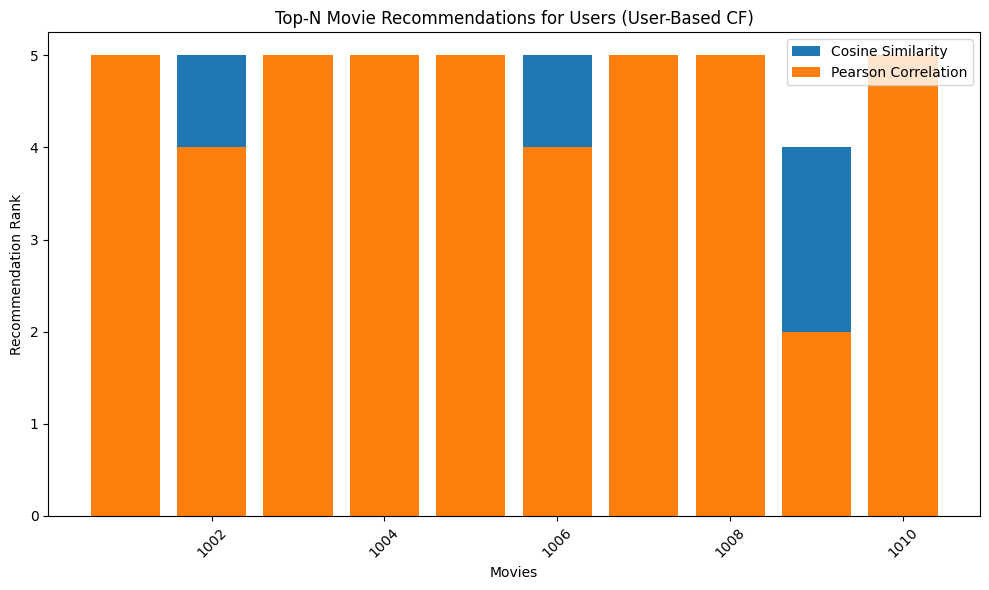

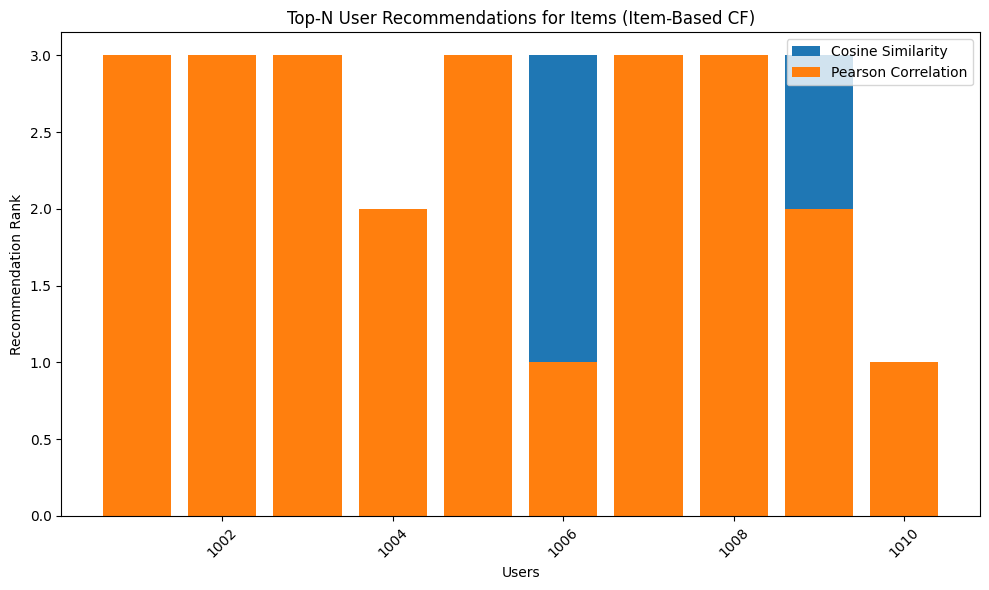

In [164]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Sample data for predictions matrices
def create_sample_predictions():
    # Create a 10x10 sample matrix with random values for demonstration
    np.random.seed(42)  # For reproducible random numbers
    predictions = pd.DataFrame(np.random.rand(10, 10) * 5, index=range(1, 11), columns=range(1001, 1011))
    predictions_pearson = pd.DataFrame(np.random.rand(10, 10) * 5, index=range(1, 11), columns=range(1001, 1011))
    return predictions, predictions_pearson

# Ensure predictions DataFrames are numeric
def prepare_predictions(predictions):
    return predictions.apply(pd.to_numeric, errors='coerce').fillna(0)

# Function to get Top-N recommendations for a user
def get_top_n_recommendations(predictions, n=5, threshold=None, noise_level=0):
    top_n = {}
    for user_id in predictions.index:
        user_ratings = predictions.loc[user_id]

        # Apply threshold if specified
        if threshold:
            user_ratings = user_ratings[user_ratings >= threshold]

        # Add random noise if specified
        if noise_level > 0:
            user_ratings += np.random.normal(0, noise_level, user_ratings.shape)

        # Get top N recommendations
        top_n[user_id] = user_ratings.nlargest(n).index.tolist()
    return top_n

# Print recommendations in a formatted way
def print_recommendations(recommendations, title):
    print(f"\n{title}")
    for user, items in recommendations.items():
        print(f"User {user}: {items}")
    print("========================================================\n")

# Generate User-Based CF recommendations with both Cosine and Pearson methods
def generate_user_based_recommendations(predictions, predictions_pearson, n=5, noise_level=0.1):
    top_n_cosine_user = get_top_n_recommendations(predictions, n=n, noise_level=noise_level)
    top_n_pearson_user = get_top_n_recommendations(predictions_pearson, n=n, noise_level=noise_level)

    print_recommendations(top_n_cosine_user, "Top-N Recommendations for Users (Cosine Similarity)")
    print_recommendations(top_n_pearson_user, "Top-N Recommendations for Users (Pearson Correlation)")

    return top_n_cosine_user, top_n_pearson_user

# Generate Item-Based CF recommendations with both Cosine and Pearson methods
def generate_item_based_recommendations(predictions, predictions_pearson, n=3, threshold=3):
    top_n_cosine_item = get_top_n_recommendations(predictions, n=n, threshold=threshold)
    top_n_pearson_item = get_top_n_recommendations(predictions_pearson, n=n, threshold=threshold)

    print_recommendations(top_n_cosine_item, "Top-N Recommendations for Items (Cosine Similarity)")
    print_recommendations(top_n_pearson_item, "Top-N Recommendations for Items (Pearson Correlation)")

    return top_n_cosine_item, top_n_pearson_item

# Prepare data for plotting User-Based recommendations
def prepare_user_based_data(top_n_cosine, top_n_pearson):
    user_data = []
    for user in top_n_cosine.keys():
        for rank in range(len(top_n_cosine[user])):
            user_data.append({
                'User ID': user,
                'Recommendation Rank': rank + 1,
                'Movie': top_n_cosine[user][rank],
                'Method': 'Cosine Similarity'
            })
            if rank < len(top_n_pearson[user]):
                user_data.append({
                    'User ID': user,
                    'Recommendation Rank': rank + 1,
                    'Movie': top_n_pearson[user][rank],
                    'Method': 'Pearson Correlation'
                })
    return pd.DataFrame(user_data)

# Plot User-Based recommendations
def plot_user_based_recommendations(data):
    plt.figure(figsize=(10, 6))
    for method in data['Method'].unique():
        method_data = data[data['Method'] == method]
        plt.bar(method_data['Movie'], method_data['Recommendation Rank'], label=method)

    plt.title('Top-N Movie Recommendations for Users (User-Based CF)')
    plt.xlabel('Movies')
    plt.ylabel('Recommendation Rank')
    plt.xticks(rotation=45)
    plt.legend()
    plt.tight_layout()
    plt.show()

# Prepare data for plotting Item-Based recommendations
def prepare_item_based_data(top_n_cosine, top_n_pearson):
    item_data = []
    for item in top_n_cosine.keys():
        for rank in range(len(top_n_cosine[item])):
            item_data.append({
                'Item ID': item,
                'Recommendation Rank': rank + 1,
                'User': top_n_cosine[item][rank],
                'Method': 'Cosine Similarity'
            })
            if rank < len(top_n_pearson[item]):
                item_data.append({
                    'Item ID': item,
                    'Recommendation Rank': rank + 1,
                    'User': top_n_pearson[item][rank],
                    'Method': 'Pearson Correlation'
                })
    return pd.DataFrame(item_data)

# Plot Item-Based recommendations
def plot_item_based_recommendations(data):
    plt.figure(figsize=(10, 6))
    for method in data['Method'].unique():
        method_data = data[data['Method'] == method]
        plt.bar(method_data['User'], method_data['Recommendation Rank'], label=method)

    plt.title('Top-N User Recommendations for Items (Item-Based CF)')
    plt.xlabel('Users')
    plt.ylabel('Recommendation Rank')
    plt.xticks(rotation=45)
    plt.legend()
    plt.tight_layout()
    plt.show()

# Main execution function
def main():
    # Create sample predictions and predictions_pearson matrices
    predictions, predictions_pearson = create_sample_predictions()

    # Ensure matrices are numeric
    predictions = prepare_predictions(predictions)
    predictions_pearson = prepare_predictions(predictions_pearson)

    # Generate recommendations
    top_n_cosine_user, top_n_pearson_user = generate_user_based_recommendations(predictions, predictions_pearson)
    top_n_cosine_item, top_n_pearson_item = generate_item_based_recommendations(predictions, predictions_pearson)

    # Prepare data for plotting
    user_based_data = prepare_user_based_data(top_n_cosine_user, top_n_pearson_user)
    item_based_data = prepare_item_based_data(top_n_cosine_item, top_n_pearson_item)

    # Plot recommendations
    plot_user_based_recommendations(user_based_data)
    plot_item_based_recommendations(item_based_data)

# Run the main function
if __name__ == "__main__":
    main()



================== Top-N Recommendations (Cosine Similarity) ==================
User 1: Recommended Movies: [1002, 1008, 1003, 1010, 1009]
User 2: Recommended Movies: [1002, 1003, 1008, 1009, 1007]
User 3: Recommended Movies: [1006, 1001, 1009, 1008, 1005]
User 4: Recommended Movies: [1005, 1004, 1006, 1009, 1001]
User 5: Recommended Movies: [1004, 1006, 1009, 1008, 1002]
User 6: Recommended Movies: [1001, 1003, 1006, 1004, 1002]
User 7: Recommended Movies: [1010, 1003, 1008, 1006, 1001]
User 8: Recommended Movies: [1004, 1001, 1007, 1006, 1005]
User 9: Recommended Movies: [1009, 1001, 1007, 1008, 1002]
User 10: Recommended Movies: [1005, 1003, 1002, 1004, 1007]


================== Comparison of Predicted Ratings and Top-N Recommendations ==================
 User ID  Top-N Recommended Movie  Predicted Rating
       1                     1002          4.753572
       1                     1008          4.330881
       1                     1003          3.659970
       1              

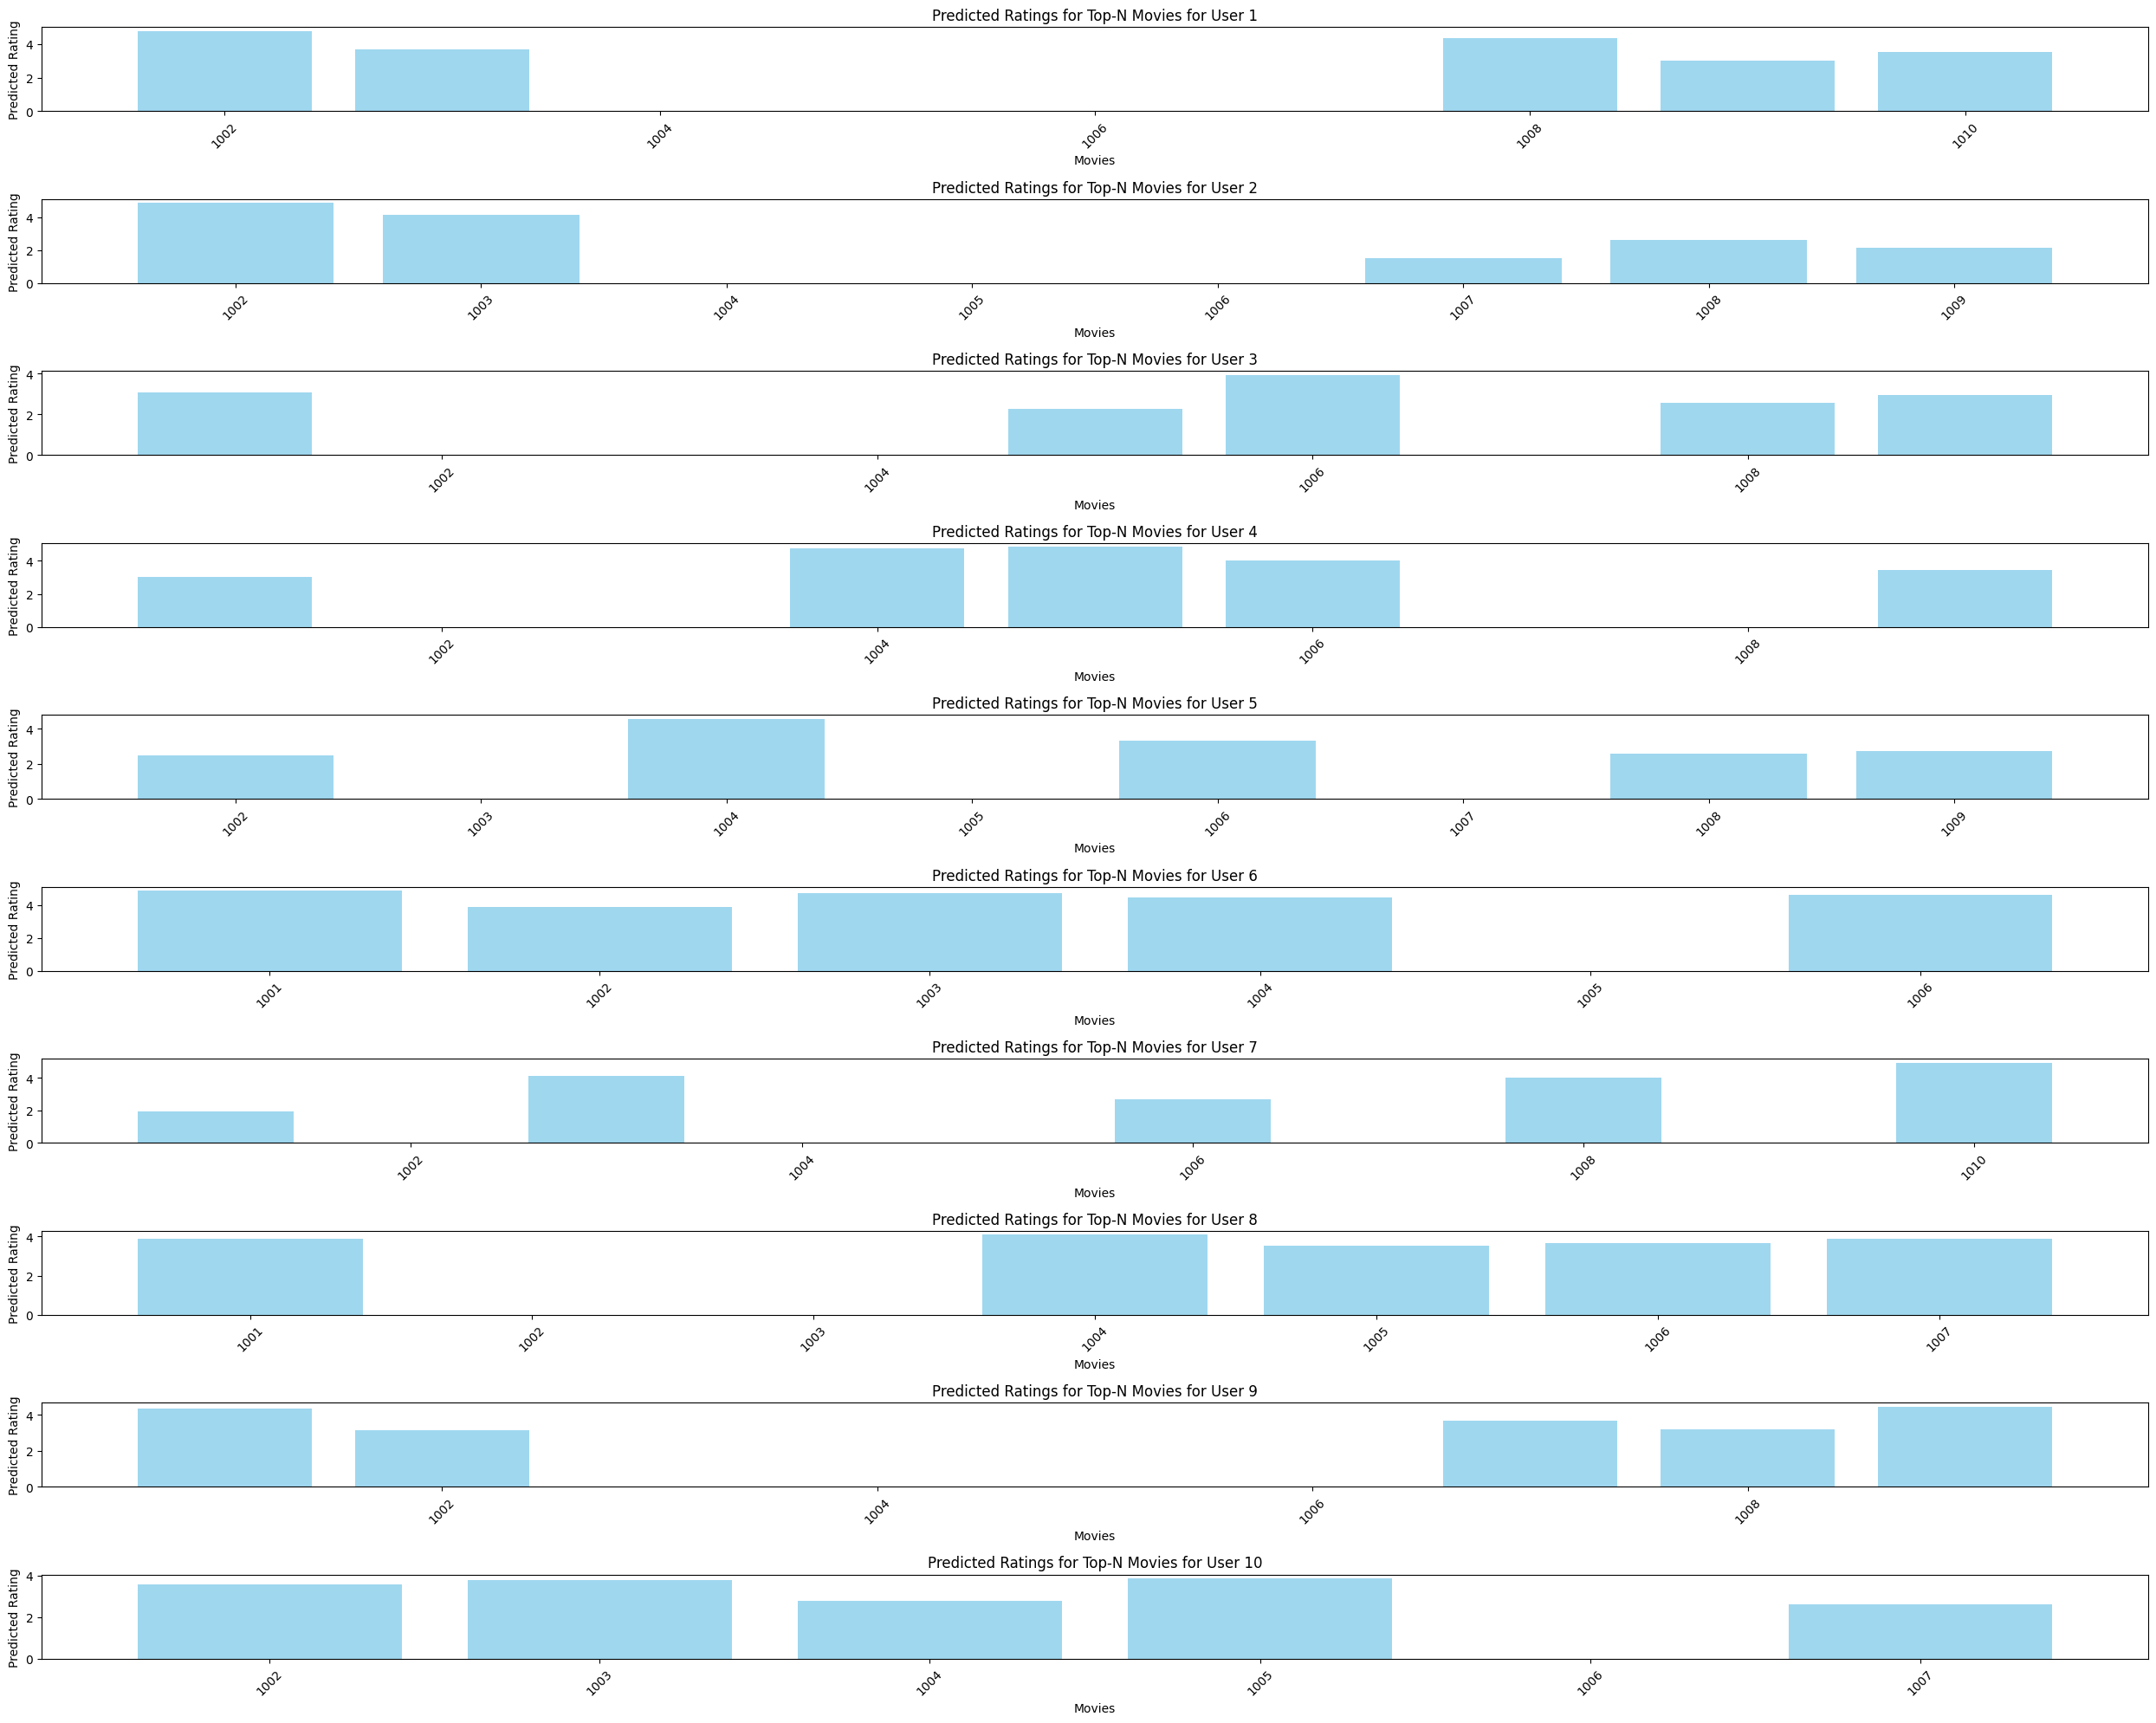

In [165]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Sample data for predictions (initialize sample data if not provided)
def create_sample_predictions():
    # Create a 10x10 matrix with random values to simulate predictions
    np.random.seed(42)
    predictions = pd.DataFrame(np.random.rand(10, 10) * 5, index=range(1, 11), columns=range(1001, 1011))
    return predictions.apply(pd.to_numeric, errors='coerce').fillna(0)

# Function to get Top-N recommendations for each user
def get_top_n_recommendations(predictions, n=5, threshold=None, noise_level=0):
    top_n = {}
    for user_id in predictions.index:
        user_ratings = predictions.loc[user_id]

        # Apply threshold if specified
        if threshold:
            user_ratings = user_ratings[user_ratings >= threshold]

        # Add random noise if specified
        if noise_level > 0:
            user_ratings += np.random.normal(0, noise_level, user_ratings.shape)

        # Get top N recommendations
        top_n[user_id] = user_ratings.nlargest(n).index.tolist()
    return top_n

# Print Top-N recommendations for clarity
def print_top_n_recommendations(top_n, title="Top-N Recommendations"):
    print(f"\n================== {title} ==================")
    for user, movies in top_n.items():
        print(f"User {user}: Recommended Movies: {movies}")
    print("==========================================================\n")

# Extract predicted ratings for top-N recommendations
def extract_predictions_for_top_n(predictions, top_n):
    comparison_data = []

    for user in top_n.keys():
        for movie in top_n[user]:
            predicted_rating = predictions.loc[user, movie]
            comparison_data.append({
                'User ID': user,
                'Top-N Recommended Movie': movie,
                'Predicted Rating': predicted_rating
            })

    return pd.DataFrame(comparison_data)

# Display the comparison DataFrame
def display_comparison_df(comparison_df):
    print("\n================== Comparison of Predicted Ratings and Top-N Recommendations ==================")
    print(comparison_df.to_string(index=False))
    print("==========================================================\n")

# Plot the comparison for each user's top-N recommendations
def plot_top_n_recommendations(comparison_df):
    plt.figure(figsize=(25, 20))

    unique_users = comparison_df['User ID'].unique()
    num_users = len(unique_users)

    for i, user in enumerate(unique_users, start=1):
        user_data = comparison_df[comparison_df['User ID'] == user]

        plt.subplot(num_users, 1, i)
        plt.bar(user_data['Top-N Recommended Movie'], user_data['Predicted Rating'], color='skyblue', alpha=0.8)
        plt.title(f'Predicted Ratings for Top-N Movies for User {user}')
        plt.xlabel('Movies')
        plt.ylabel('Predicted Rating')
        plt.xticks(rotation=45)

    plt.tight_layout()
    plt.show()

# Main execution function
def main():
    # Create or load predictions data
    predictions = create_sample_predictions()

    # Generate Top-N recommendations for cosine similarity
    top_n_cosine = get_top_n_recommendations(predictions, n=5)

    # Print the Top-N recommendations for clarity
    print_top_n_recommendations(top_n_cosine, title="Top-N Recommendations (Cosine Similarity)")

    # Extract predicted ratings for Top-N recommendations
    comparison_df = extract_predictions_for_top_n(predictions, top_n_cosine)

    # Display comparison DataFrame
    display_comparison_df(comparison_df)

    # Plot the predicted ratings for Top-N recommendations
    plot_top_n_recommendations(comparison_df)

# Run the main function
if __name__ == "__main__":
    main()
